<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://raw.githubusercontent.com/Unidata/MetPy/master/src/metpy/plots/_static/unidata_150x150.png" alt="Unidata Logo" style="height: 98px;">
</div>

<h1>Advanced Pythonic Data Analysis</h1>
<h3>Unidata Python Workshop</h3>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

<div style="float:right; width:250 px"><img src="http://matplotlib.org/_images/date_demo.png" alt="METAR" style="height: 300px;"></div>


## Overview:

* **Teaching:** 45 minutes
* **Exercises:** 45 minutes

### Questions
1. How can we improve upon the versatility of the plotter developed in the basic time series notebook?
1. How can we iterate over all data file in a directory?
1. How can data processing functions be applied on a variable-by-variable basis?

### Objectives
1. <a href="#basicfunctionality">From Time Series Plotting Episode</a>
1. <a href="#parameterdict">Dictionaries of Parameters</a>
1. <a href="#multipledict">Multiple Dictionaries</a>
1. <a href="#functions">Function Application</a>
1. <a href="#glob">Glob and Multiple Files</a>

<a name="basicfunctionality"></a>
## From Time Series Plotting Episode
Here's the basic set of imports and data reading functionality that we established in the [Basic Time Series Plotting](../Time_Series/Basic%20Time%20Series%20Plotting.ipynb) notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator
from siphon.simplewebservice.ndbc import NDBC

%matplotlib inline

In [2]:
def format_varname(varname):
    """Format the variable name nicely for titles and labels."""
    parts = varname.split('_')
    title = parts[0].title()
    label = varname.replace('_', ' ').title()
    return title, label

In [3]:
def read_buoy_data(buoy, days=7): 
    # Read in some data
    df = NDBC.realtime_observations(buoy)

    # Trim to the last 7 days
    df = df[df['time'] > (pd.Timestamp.utcnow() - pd.Timedelta(days=days))]
    return df

<a href="#top">Top</a>
<hr style="height:2px;">

<a name="parameterdict"></a>
## Dictionaries of Parameters

When we left off last time, we had created dictionaries that stored line colors and plot properties in a key value pair. To further simplify things, we can actually pass a dictionary of arguements to the plot call. Enter the dictionary of dictionaries. Each key has a value that is a dictionary itself with it's key value pairs being the arguements to each plot call. Notice that different variables can have different arguements!

In [4]:
df = read_buoy_data('42039')

In [5]:
# Dictionary of plotting parameters by variable name
styles = {'wind_speed': dict(color='tab:orange'),
          'wind_gust': dict(color='tab:olive', linestyle='None', marker='o', markersize=2),
          'pressure': dict(color='black')}

plot_variables = [['wind_speed', 'wind_gust'], ['pressure']]

/home/travis/miniconda/envs/unidata/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


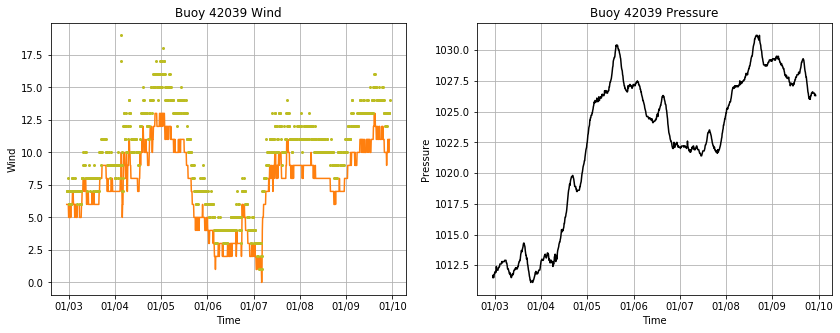

In [6]:
fig, axes = plt.subplots(1, len(plot_variables), sharex=True, figsize=(14, 5))

for col, var_names in enumerate(plot_variables):
    ax = axes[col]
    for var_name in var_names:
        title, label = format_varname(var_name)
        ax.plot(df.time, df[var_name], **styles[var_name])

    ax.set_ylabel(title)
    ax.set_title('Buoy 42039 {}'.format(title))

    ax.grid(True)
    ax.set_xlabel('Time')
    ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))
    ax.xaxis.set_major_locator(DayLocator())

<a href="#top">Top</a>
<hr style="height:2px;">

<a name="multipledict"></a>
## Multiple Dictionaries

We can even use multiple dictionaries to define styles for types of observations and then specific observation properties such as levels, sources, etc. One common use case of this would be plotting all temperature data as red, but with different linestyles for an isobaric level and the surface. 

In [7]:
type_styles = {'Temperature': dict(color='red', marker='o'),
               'Relative humidity': dict(color='green', marker='s')}

level_styles = {'isobaric': dict(linestyle='-', linewidth=2),
                'surface': dict(linestyle=':', linewidth=3)}

In [8]:
my_style = type_styles['Temperature']
print(my_style)

{'color': 'red', 'marker': 'o'}


In [9]:
my_style.update(level_styles['isobaric'])
print(my_style)

{'color': 'red', 'marker': 'o', 'linestyle': '-', 'linewidth': 2}


If we look back at the original entry in `type_styles` we see it was updated too! That may not be the expected or even the desired behavior. 

In [10]:
type_styles['Temperature']

{'color': 'red', 'marker': 'o', 'linestyle': '-', 'linewidth': 2}

We can use the `copy` method to make a copy of the element and avoid update the original.

In [11]:
type_styles = {'Temperature': dict(color='red', marker='o'),
               'Relative humidity': dict(color='green', marker='s')}

level_styles = {'isobaric': dict(linestyle='-', linewidth=2),
                'surface': dict(linestyle=':', linewidth=3)}

my_style = type_styles['Temperature'].copy()  # Avoids altering the original entry
my_style.update(level_styles['isobaric'])
print(my_style)

{'color': 'red', 'marker': 'o', 'linestyle': '-', 'linewidth': 2}


In [12]:
type_styles['Temperature']

{'color': 'red', 'marker': 'o'}

Since we don't have data from different levels, we'll work with wind measurements and pressure data. Our <code>format_varname</code> function returns a title and full variable name label.

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
    <li>Create a type styles dictionary of dictionaries with the variable title as the key that has styles for `Wind` and `Pressure` data. The pressure should be a solid black line. Wind should be a solid line.</li>
    <li>Create a variable style dictionary of dictionaries with the variable name as the key that specifies an orange line of width 2 for wind speed, olive line of width 0.5 for gusts, and no additional information for pressure.</li>
    <li>Update the plotting code below to use the new type and variable styles dictionary.
    </ul>
</div>

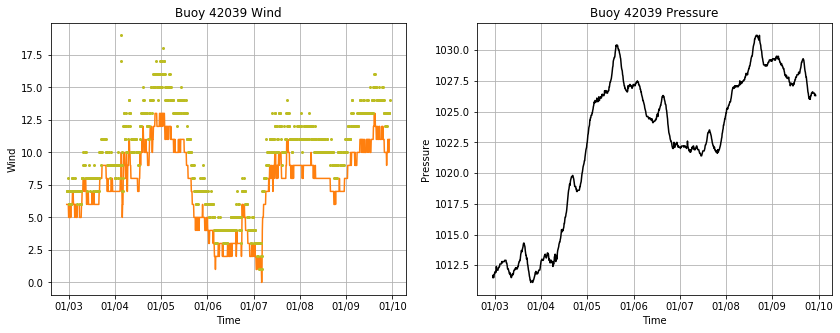

In [13]:
# Your code goes here (modify the skeleton below)
type_styles = {}

variable_styles = {}

fig, axes = plt.subplots(1, len(plot_variables), sharex=True, figsize=(14, 5))

for col, var_names in enumerate(plot_variables):
    ax = axes[col]
    for var_name in var_names:
        title, label = format_varname(var_name)
        ax.plot(df.time, df[var_name], **styles[var_name])

    ax.set_ylabel(title)
    ax.set_title('Buoy 42039 {}'.format(title))

    ax.grid(True)
    ax.set_xlabel('Time')
    ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))
    ax.xaxis.set_major_locator(DayLocator())

#### Solution

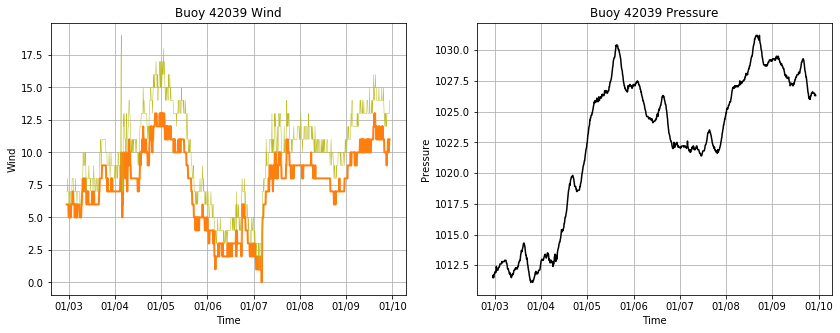

In [14]:
# %load solutions/dict_args.py


# Cell content replaced by load magic replacement.
type_styles = {'Pressure': dict(color='black'),
               'Wind': dict(linestyle='-')}

variable_styles = {'pressure': dict(),
                   'wind_speed': dict(color='tab:orange', linewidth=2),
                   'wind_gust': dict(color='tab:olive', linewidth=0.5)}

fig, axes = plt.subplots(1, len(plot_variables), sharex=True, figsize=(14, 5))

for col, var_names in enumerate(plot_variables):
    ax = axes[col]
    for var_name in var_names:
        title, label = format_varname(var_name)
        style = type_styles[title].copy()  # So the next line doesn't change the original
        style.update(variable_styles[var_name])
        ax.plot(df.time, df[var_name], **style)

    ax.set_ylabel(title)
    ax.set_title('Buoy 42039 {}'.format(title))

    ax.grid(True)
    ax.set_xlabel('Time')
    ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))
    ax.xaxis.set_major_locator(DayLocator())


<a href="#top">Top</a>
<hr style="height:2px;">

<a name="functions"></a>
## Function Application

There are times where we might want to apply a certain amount of pre-processing to the data before they are plotted. Maybe we want to do a unit conversion, scale the data, or filter it. We can create a dictionary in which functions are the values and variable names are the keys.

For example, let's define a function that uses the running median to filter the wind data (effectively a low-pass). We'll also make a do nothing function for data we don't want to alter.

In [15]:
from scipy.signal import medfilt

def filter_wind(a):
    return medfilt(a, 7)

def donothing(a):
    return a

In [16]:
converters = {'Wind': filter_wind, 'Pressure': donothing}

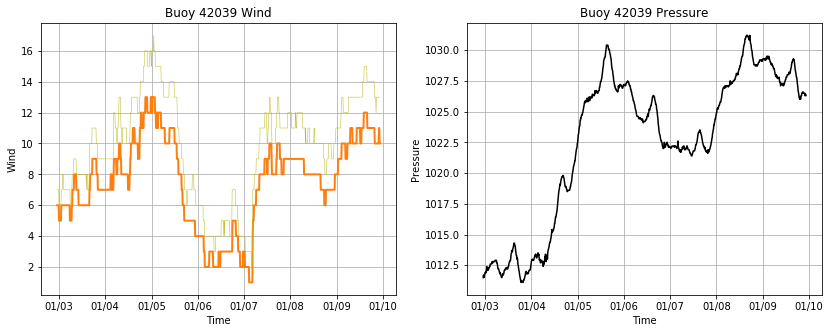

In [17]:
type_styles = {'Pressure': dict(color='black'),
               'Wind': dict(linestyle='-')}

variable_styles = {'pressure': dict(),
                   'wind_speed': dict(color='tab:orange', linewidth=2),
                   'wind_gust': dict(color='tab:olive', linewidth=0.5)}

fig, axes = plt.subplots(1, len(plot_variables), sharex=True, figsize=(14, 5))

for col, var_names in enumerate(plot_variables):
    ax = axes[col]
    for var_name in var_names:
        title, label = format_varname(var_name)
        
        # Apply our pre-processing
        var_data = converters[title](df[var_name])
        
        style = type_styles[title].copy()  # So the next line doesn't change the original
        style.update(variable_styles[var_name])
        ax.plot(df.time, var_data, **style)

    ax.set_ylabel(title)
    ax.set_title('Buoy 42039 {}'.format(title))

    ax.grid(True)
    ax.set_xlabel('Time')
    ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))
    ax.xaxis.set_major_locator(DayLocator())

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
    <li>Write a function to convert the pressure data to bars. (**Hint**: 1 bar = 100000 Pa)</li>
    <li>Apply your converter in the code below and replot the data.</li>
    </ul>
</div>

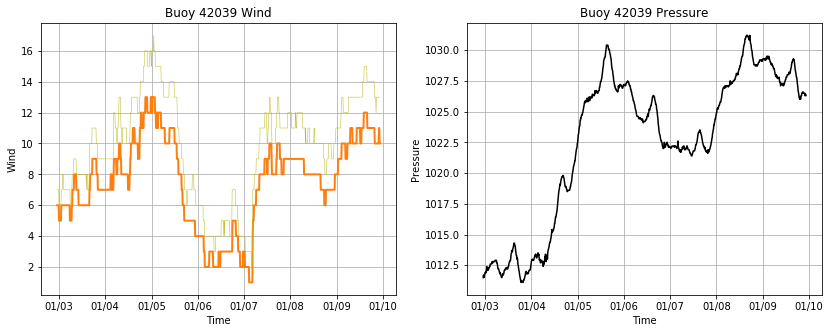

In [18]:
# Your code goes here (modify the code below)

converters = {'Wind': filter_wind, 'Pressure': donothing}

type_styles = {'Pressure': dict(color='black'),
               'Wind': dict(linestyle='-')}

variable_styles = {'pressure': dict(),
                   'wind_speed': dict(color='tab:orange', linewidth=2),
                   'wind_gust': dict(color='tab:olive', linewidth=0.5)}

fig, axes = plt.subplots(1, len(plot_variables), sharex=True, figsize=(14, 5))

for col, var_names in enumerate(plot_variables):
    ax = axes[col]
    for var_name in var_names:
        title, label = format_varname(var_name)
        
        # Apply our pre-processing
        var_data = converters[title](df[var_name])
        
        style = type_styles[title].copy()  # So the next line doesn't change the original
        style.update(variable_styles[var_name])
        ax.plot(df.time, var_data, **style)

    ax.set_ylabel(title)
    ax.set_title('Buoy 42039 {}'.format(title))

    ax.grid(True)
    ax.set_xlabel('Time')
    ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))
    ax.xaxis.set_major_locator(DayLocator())

#### Solution

<div class="alert alert-info">
    <b>REMINDER</b>:
    You should be using the unit library to convert between various physical units, this is simply for demonstration purposes!
</div>

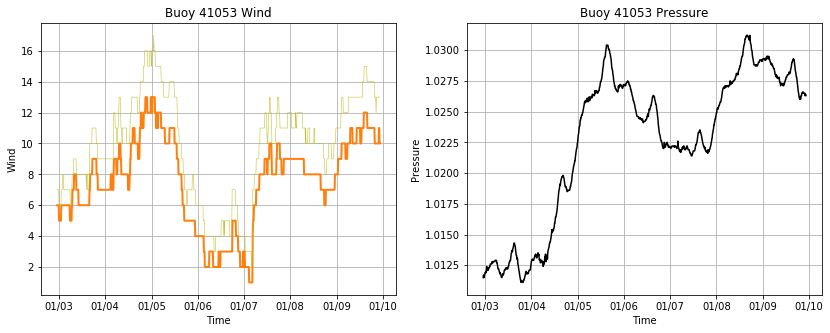

In [19]:
# %load solutions/function_application.py

# Cell content replaced by load magic replacement.
def convert_pressure(a):
    return a * 1e-3

converters = {'Wind': filter_wind, 'Pressure': convert_pressure}

type_styles = {'Pressure': dict(color='black'),
               'Wind': dict(linestyle='-')}

variable_styles = {'pressure': dict(),
                   'wind_speed': dict(color='tab:orange', linewidth=2),
                   'wind_gust': dict(color='tab:olive', linewidth=0.5)}

fig, axes = plt.subplots(1, len(plot_variables), sharex=True, figsize=(14, 5))

for col, var_names in enumerate(plot_variables):
    ax = axes[col]
    for var_name in var_names:
        title, label = format_varname(var_name)

        # Apply our pre-processing
        var_data = converters[title](df[var_name])

        style = type_styles[title].copy()  # So the next line doesn't change the original
        style.update(variable_styles[var_name])
        ax.plot(df.time, var_data, **style)

    ax.set_ylabel(title)
    ax.set_title('Buoy 41053 {}'.format(title))

    ax.grid(True)
    ax.set_xlabel('Time')
    ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))
    ax.xaxis.set_major_locator(DayLocator())


<a href="#top">Top</a>
<hr style="height:2px;">

<a name="glob"></a>
## Multiple Buoys

We can now use the techniques we've seen before to make a plot of multiple buoys in a single figure.

In [20]:
buoys = ['42039', '42022']

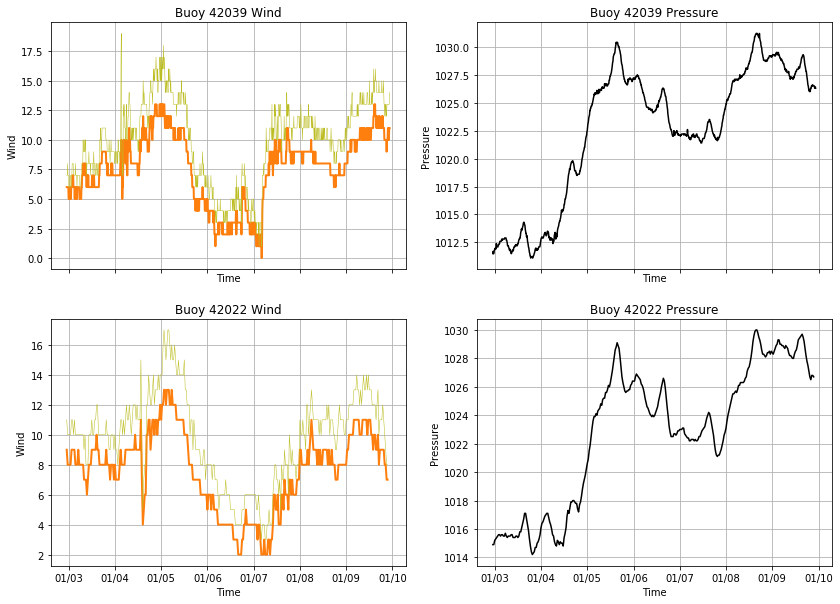

In [21]:
type_styles = {'Pressure': dict(color='black'),
               'Wind': dict(linestyle='-')}

variable_styles = {'pressure': dict(),
                   'wind_speed': dict(color='tab:orange', linewidth=2),
                   'wind_gust': dict(color='tab:olive', linewidth=0.5)}

fig, axes = plt.subplots(len(buoys), len(plot_variables), sharex=True, figsize=(14, 10))

for row, buoy in enumerate(buoys):
    df = read_buoy_data(buoy)
    for col, var_names in enumerate(plot_variables):
        ax = axes[row, col]
        for var_name in var_names:
            title, label = format_varname(var_name)
            style = type_styles[title].copy()  # So the next line doesn't change the original
            style.update(variable_styles[var_name])
            ax.plot(df.time, df[var_name], **style)

        ax.set_ylabel(title)
        ax.set_title('Buoy {} {}'.format(buoy, title))

        ax.grid(True)
        ax.set_xlabel('Time')
        ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))
        ax.xaxis.set_major_locator(DayLocator())

<a href="#top">Top</a>
<hr style="height:2px;">

<div class="alert alert-success">
    <b>EXERCISE</b>: As a final exercise, use a dictionary to allow all of the plots to share common y axis limits based on the variable title.
</div>

In [22]:
# Your code goes here


#### Solution

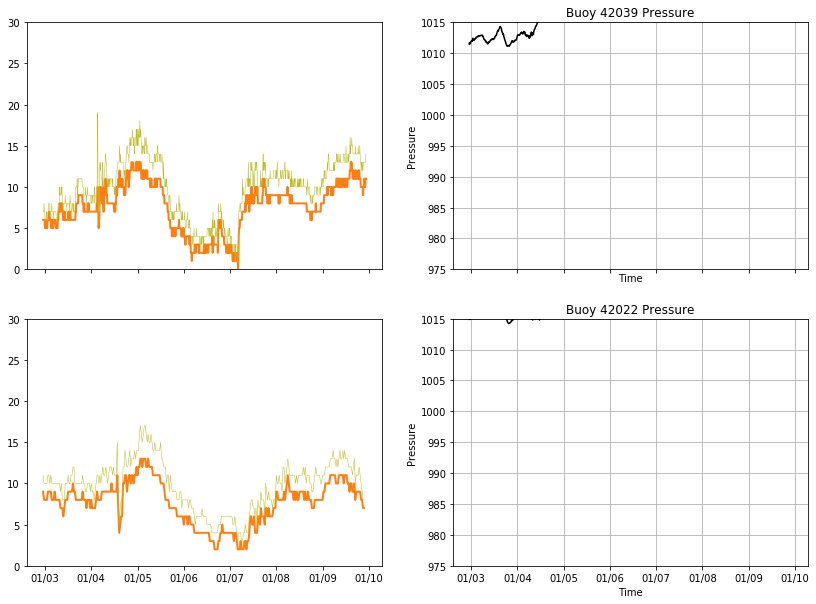

In [23]:
# %load solutions/final.py

# Cell content replaced by load magic replacement.
bounds = {'Wind': (0, 30),
          'Pressure': (975, 1015)}

type_styles = {'Pressure': dict(color='black'),
               'Wind': dict(linestyle='-')}


variable_styles = {'pressure': dict(),
                   'wind_speed': dict(color='tab:orange', linewidth=2),
                   'wind_gust': dict(color='tab:olive', linewidth=0.5)}


fig, axes = plt.subplots(len(buoys), len(plot_variables), sharex=True, figsize=(14, 10))


for row, buoy in enumerate(buoys):
    df = read_buoy_data(buoy)
    for col, var_names in enumerate(plot_variables):
        ax = axes[row, col]
        for var_name in var_names:
            title, label = format_varname(var_name)
            style = type_styles[title].copy()  # So the next line doesn't change the original
            style.update(variable_styles[var_name])
            ax.plot(df.time, df[var_name], **style)
            ax.set_ylim(bounds[title])


    ax.set_ylabel(title)
    ax.set_title('Buoy {} {}'.format(buoy, title))

    ax.grid(True)
    ax.set_xlabel('Time')
    ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))
    ax.xaxis.set_major_locator(DayLocator())


<a href="#top">Top</a>
<hr style="height:2px;">